Links to other notebooks in the same folder:
<a href='http://pivotal.io/data-science'><img src='https://raw.githubusercontent.com/crawles/Logos/master/Pivotal_TealOnWhite.png' width='200px' align='right'></a>

<nav class = "navbar navbar-light bg-faded">
    <ul class = "nav navbar-nav">
        <li class = "">
            <a class = "nav-link">notebook1</a>
        </li>
        <li class = "">
            <a class = "nav-link">notebook2</a>
        </li>
        <li class = "">
            <a class = "nav-link">notebook3</a>
        </li>
        

# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Plotting-from-Data-in-an-MPP-Database" data-toc-modified-id="Plotting-from-Data-in-an-MPP-Database-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Plotting from Data in an MPP Database</a></div><div class="lev1 toc-item"><a href="#Load-Libraries-and-Set-Default-Settings" data-toc-modified-id="Load-Libraries-and-Set-Default-Settings-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load Libraries and Set Default Settings</a></div><div class="lev1 toc-item"><a href="#Connect-to-Database" data-toc-modified-id="Connect-to-Database-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Connect to Database</a></div><div class="lev1 toc-item"><a href="#Magic-Functions-Useful-for-Interacting-with-the-Cluster" data-toc-modified-id="Magic-Functions-Useful-for-Interacting-with-the-Cluster-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Magic Functions Useful for Interacting with the Cluster</a></div><div class="lev1 toc-item"><a href="#Creating-Fake-Data" data-toc-modified-id="Creating-Fake-Data-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Creating Fake Data</a></div><div class="lev1 toc-item"><a href="#Plotting-Categorical-Histograms" data-toc-modified-id="Plotting-Categorical-Histograms-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Plotting Categorical Histograms</a></div><div class="lev2 toc-item"><a href="#Plotting-a-Single-Variable" data-toc-modified-id="Plotting-a-Single-Variable-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Plotting a Single Variable</a></div><div class="lev2 toc-item"><a href="#Plotting-Multiple-Histograms" data-toc-modified-id="Plotting-Multiple-Histograms-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Plotting Multiple Histograms</a></div><div class="lev1 toc-item"><a href="#Plot-the-Numerical-Histograms" data-toc-modified-id="Plot-the-Numerical-Histograms-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Plot the Numerical Histograms</a></div><div class="lev2 toc-item"><a href="#Plotting-a-Single-Histogram" data-toc-modified-id="Plotting-a-Single-Histogram-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Plotting a Single Histogram</a></div><div class="lev2 toc-item"><a href="#Plotting-Multiple-Histograms" data-toc-modified-id="Plotting-Multiple-Histograms-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Plotting Multiple Histograms</a></div><div class="lev2 toc-item"><a href="#Plotting-Date-Histograms" data-toc-modified-id="Plotting-Date-Histograms-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Plotting Date Histograms</a></div><div class="lev2 toc-item"><a href="#Recasting-values" data-toc-modified-id="Recasting-values-7.4"><span class="toc-item-num">7.4&nbsp;&nbsp;</span>Recasting values</a></div><div class="lev2 toc-item"><a href="#Plotting-on-a-log-scale" data-toc-modified-id="Plotting-on-a-log-scale-7.5"><span class="toc-item-num">7.5&nbsp;&nbsp;</span>Plotting on a log scale</a></div><div class="lev2 toc-item"><a href="#Specifying-Bin-Width" data-toc-modified-id="Specifying-Bin-Width-7.6"><span class="toc-item-num">7.6&nbsp;&nbsp;</span>Specifying Bin Width</a></div><div class="lev2 toc-item"><a href="#Normalizing-Plots" data-toc-modified-id="Normalizing-Plots-7.7"><span class="toc-item-num">7.7&nbsp;&nbsp;</span>Normalizing Plots</a></div><div class="lev1 toc-item"><a href="#Plot-the-Summarized-Data-as-a-Scatter-Plot" data-toc-modified-id="Plot-the-Summarized-Data-as-a-Scatter-Plot-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Plot the Summarized Data as a Scatter Plot</a></div>

# Plotting from Data in an MPP Database
A very common task when doing data analysis is plotting. However, if we are working with very large amounts of data (on the order of billions of rows), we cannot simply pull this data and use a plotting library such as matplotlib to plot the data. Processing times may be too long or the data might not even fit in memory. This notebook illustrates how to take data in an MPP database such as HAWQ or GPDB and condense that information in-database. Using the summarized information, we can then plot our data.

# Load Libraries and Set Default Settings

In [1]:
from datetime import datetime
from dateutil.relativedelta import relativedelta
import getopt
import os
import sys
import urllib

from IPython.core.display import display, HTML
from IPython.core.magic import register_cell_magic, register_line_cell_magic, register_line_magic
# If we want to move the graph
# %matplotlib notebook
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas.io.sql as psql
import psycopg2
import seaborn as sns

# Credentials file to connect to database
import credentials
from mpp_plotting_functions import *
from sql_functions import *

/Users/gregorytam/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
# Changes logo to a Pivotal logo
jPrefs = urllib.urlopen("https://raw.githubusercontent.com/crawles/Logos/master/jupyterPrefs.js").read()
HTML('<script>{}</script>'.format(jPrefs))

In [3]:
# Set default cell width
display(HTML('<style>.container {width:80% !important;}</style>'))

# Set default matplotlib settings
mpl.rcParams['figure.figsize'] = (10, 7)
mpl.rcParams['lines.linewidth'] = 3
mpl.rcParams['figure.titlesize'] = 26
mpl.rcParams['axes.labelsize'] = 18
mpl.rcParams['axes.titlesize'] = 22
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
mpl.rcParams['legend.fontsize'] = 16

# Set seaborn colours
blue, green, red, purple, yellow, cyan = sns.color_palette()

# Connect to Database

In [4]:
conn = psycopg2.connect(**credentials.login_info_dict)
conn.autocommit = True

# Set the schema name
schema_name = 'template'
psql.execute('SET search_path TO {}'.format(schema_name), conn)

<cursor object at 0x119405528; closed: 0>

# Magic Functions Useful for Interacting with the Cluster
These functions allow us to type write and run raw SQL a cell with the magic function at the top.

In [5]:
@register_cell_magic
def readsql(line, cell):
    """
    Extract the code in the specific cell (should be valid SQL), 
    and execute it using the connection object to the backend 
    database. The resulting pandas DataFrame is rendered inline 
    below the cell using IPython.display. You'd use this for SELECT.
    
    Returns a DataFrame with the name specified in the magic
    function. If this is not specified, then the DataFrame
    is called _df. This also takes in an option "-h", followed 
    by a number. This will show only the specified number of rows
    in the DataFrame.
    """
    # Use the global connection object defined above.
    global conn
    optlist, args = getopt.getopt(line.split(), 'ih:')
    optdict = dict(optlist) 
    # If '-h' tag is specified, set the number of rows to display
    if '-h' in optdict:
        head_num = int(optdict['-h'])
    
    # Do string formatting. If a PL/Python function
    # is being created, then it should not try and
    # format whatever is inside the function.
    split_cell = cell.split('$')
    if '-i' not in optdict:
        if len(split_cell) > 1:
            split_cell[0] = split_cell[0].format(**globals())
            split_cell[-1] = split_cell[-1].format(**globals())
            cell = '$'.join(split_cell)
        elif len(split_cell) == 1:
            cell = cell.format(**globals()) 
    
    # If there is more than one table name specified,
    # throw an exception.
    if len(args) > 1:
        raise Exception('More than one table name specified.')

    elif len(args) == 1:
        # If a table name is specified, store it as that
        table_name = args[0]
        globals()[table_name] = psql.read_sql(cell, conn)
        if '-h' in optdict:
            # If head_num is not 0, then display rows
            if head_num != 0:
                display(globals()[table_name].head(int(optdict['-h'])))
        else:
            display(globals()[table_name])

    else:
        # Otherwise, call it _df
        global _df
        _df = psql.read_sql(cell, conn)
        if '-h' in optdict:
            # If head_num is not 0, then display rows
            if head_num != 0:
                display(_df.head(head_num))
        else:
            display(_df)

@register_cell_magic
def execsql(line, cell):
    """
    Extract the code in the specific cell (should be valid SQL),
    and execute it using the connection object to the backend 
    database. You'd use this for CREATE/UPDATE/DELETE.
    """
    # Use the global connection object defined above.
    global conn
    optlist, args = getopt.getopt(line.split(), 'ih:')
    optdict = dict(optlist)
    
    # Do string formatting. If a PL/Python function
    # is being created, then it should not try and
    # format whatever is inside the function.
    split_cell = cell.split('$')
    if '-i' not in optdict:
        if len(split_cell) > 1:
            split_cell[0] = split_cell[0].format(**globals())
            split_cell[-1] = split_cell[-1].format(**globals())
            cell = '$'.join(split_cell)
        elif len(split_cell) == 1:
            cell = cell.format(**globals())
    psql.execute(cell, conn)

@register_cell_magic
def printsql(line, cell):
    """
    Show the SQL query that will be run.
    """
    optlist, args = getopt.getopt(line.split(), 'ih:')
    optdict = dict(optlist)
    
    # Do string formatting. If a PL/Python function
    # is being created, then it should not try and
    # format whatever is inside the function.
    split_cell = cell.split('$')
    if '-i' not in optdict:
        if len(split_cell) > 1:
            split_cell[0] = split_cell[0].format(**globals())
            split_cell[-1] = split_cell[-1].format(**globals())
            cell = '$'.join(split_cell)
        elif len(split_cell) == 1:
            cell = cell.format(**globals())
    print cell

# We delete these to avoid name conflicts for automagic to work
del execsql, readsql, printsql

# Creating Fake Data

Begin by creating random fake data in our database. We will add some NULL rows too to show how these functions deal with them.

In [6]:
%%execsql
-- Function to create normally distributed data.
DROP FUNCTION IF EXISTS generate_normal_data(loc NUMERIC, 
                                             scale NUMERIC,
                                             size INT);
CREATE OR REPLACE FUNCTION generate_normal_data(loc NUMERIC,
                                                scale NUMERIC,
                                                size INT
                                               )
RETURNS SETOF NUMERIC AS
$$
import numpy as np

return np.random.normal(loc, scale, size)
$$
LANGUAGE plpythonu IMMUTABLE;


DROP TABLE IF EXISTS test_data;
CREATE TABLE test_data
   AS SELECT random()^2 * 50 AS log_col,
             50 - random()^2 * 50 AS log_col_2,
             (random()^2 * 50)::INT AS log_col_int,
             CASE WHEN random() < 0.5 THEN 'category_a'
                  WHEN random() < 0.7 THEN 'category_b'
                  WHEN random() < 0.85 THEN 'category_c'
                  WHEN random() < 0.95 THEN 'category_d'
                  ELSE 'category_e'
              END AS category_1,
             CASE WHEN random() < 0.2 THEN 'category_a'
                  WHEN random() < 0.4 THEN 'category_b'
                  WHEN random() < 0.6 THEN 'category_c'
                  WHEN random() < 0.8 THEN 'category_d'
                  ELSE 'category_e'
              END AS category_2,
             (random()*100 + 50)::text AS uncasted_col,
             '2015-01-01'::DATE + (random()^2 * 365)::INT AS random_date,
             generate_normal_data(0.0, 1.0, 1) AS normal_x,
             generate_normal_data(0.0, 1.0, 1) AS normal_y
        FROM generate_series(1, 10000)
       UNION ALL
      SELECT NULL AS log_col,
             50 - random()^2 * 50 AS log_col_2,
             (random()^2 * 50)::INT AS log_col_int,
             NULL AS category_1,
             CASE WHEN random() < 0.2 THEN 'category_a'
                  WHEN random() < 0.4 THEN 'category_b'
                  WHEN random() < 0.6 THEN 'category_c'
                  WHEN random() < 0.8 THEN 'category_d'
                  ELSE 'category_e'
              END AS category_2,
             NULL AS uncasted_col,
             NULL AS random_date,
             generate_normal_data(0.0, 1.0, 1) AS normal_x,
             generate_normal_data(0.0, 1.0, 1) AS normal_y
        FROM generate_series(1, 1000);
        
DROP TABLE IF EXISTS small_test_data;
CREATE TABLE small_test_data
   AS SELECT random()^2 * 50 AS log_col,
             50 - random()^2 * 50 AS log_col_2,
             (random()^2 * 50)::INT AS log_col_int,
             CASE WHEN random() < 0.5 THEN 'category_a'
                  WHEN random() < 0.7 THEN 'category_b'
                  WHEN random() < 0.85 THEN 'category_c'
                  WHEN random() < 0.95 THEN 'category_d'
                  ELSE 'category_e'
              END AS category_1,
             CASE WHEN random() < 0.2 THEN 'category_a'
                  WHEN random() < 0.4 THEN 'category_b'
                  WHEN random() < 0.6 THEN 'category_c'
                  WHEN random() < 0.8 THEN 'category_d'
                  ELSE 'category_e'
              END AS category_2,
             (random()*100 + 50)::text AS uncasted_col
        FROM generate_series(1, 1000)
       UNION ALL
      SELECT NULL AS log_col,
             50 - random()^2 * 50 AS log_col_2,
             (random()^2 * 50)::INT AS log_col_int,
             NULL AS category_1,
             CASE WHEN random() < 0.2 THEN 'category_a'
                  WHEN random() < 0.4 THEN 'category_b'
                  WHEN random() < 0.6 THEN 'category_c'
                  WHEN random() < 0.8 THEN 'category_d'
                  ELSE 'category_e'
              END AS category_2,
             NULL AS uncasted_col
        FROM generate_series(1, 100);

In [7]:
%%readsql
SELECT *
  FROM test_data
 LIMIT 10;

,log_col,log_col_2,log_col_int,category_1,category_2,uncasted_col,random_date,normal_x,normal_y
0,34.699193,49.794913,28,category_a,category_b,131.152811693028,2015-01-15,-0.341834,1.672830
1,42.700081,27.937194,16,category_a,category_b,67.0190075878054,2015-02-11,1.079478,0.476150
2,3.350999,44.579155,19,category_b,category_d,140.404122835025,2015-01-02,-0.418942,0.272392
3,24.432280,47.200996,5,category_b,category_c,123.801220208406,2015-01-10,0.037731,0.522035
4,2.666716,35.887396,22,category_b,category_d,60.1600657217205,2015-01-22,-0.941629,-1.242806
5,14.977393,2.817872,23,category_a,category_c,113.827448617667,2015-05-29,0.282806,-0.157389
6,0.749385,43.494160,11,category_b,category_d,83.5722912102938,2015-01-02,0.277322,-1.170757
7,1.072973,34.112596,9,category_b,category_b,145.431521441787,2015-01-04,0.664161,-0.022321
8,0.825513,42.125349,2,category_a,category_c,55.5308149661869,2015-01-07,-1.578665,-1.326467
9,14.717126,49.996715,5,category_a,category_d,96.6206153854728,2015-12-20,-1.218642,-1.170813


# Plotting Categorical Histograms
We can first get the histogram values for categorical data. This is simply taking a group by and then counting. The <code>get_histogram_values</code> function will achieve this by running it in database.

In [8]:
category_hist_df = get_histogram_values('test_data', 'category_1', conn, nbins=25)
category_hist_df_2 = get_histogram_values('test_data', 'category_2', conn, nbins=25)

By default, this will take the table in whichever schema name was set. If we want to specify a table with the same name from a different schema, we can either set the schema again or simply prepend the table name with the schema name and a period (i.e., schema_name.table_name)

In [9]:
category_hist_df = get_histogram_values('template.test_data', 'category_1', conn, nbins=25)
category_hist_df_2 = get_histogram_values('template.test_data', 'category_2', conn, nbins=25)

This table is just a pandas DataFrame of each of the categories and their respective counts. We can use this DataFrame in conjunction with our plotting functions.

In [10]:
display(category_hist_df)
display(category_hist_df_2)

,category,freq
0,category_a,4967
1,category_b,3524
2,category_c,1283
3,None,1000
4,category_d,217
5,category_e,9


,category,freq
0,category_b,3568
1,category_c,3089
2,category_a,2194
3,category_d,1703
4,category_e,446


## Plotting a Single Variable
We can use the <code>plot_categorical_hists</code> function to plot one or multiple histograms for categorical variables. If there are any null values in the column, we can specify where we want to place them (on the left or right, in order, or simply ignore it). We can also specify our ordering (ascending or descending and alphatically or by frequency.  This will take in the DataFrame we created above using the <code>get_histogram_values</code> function.

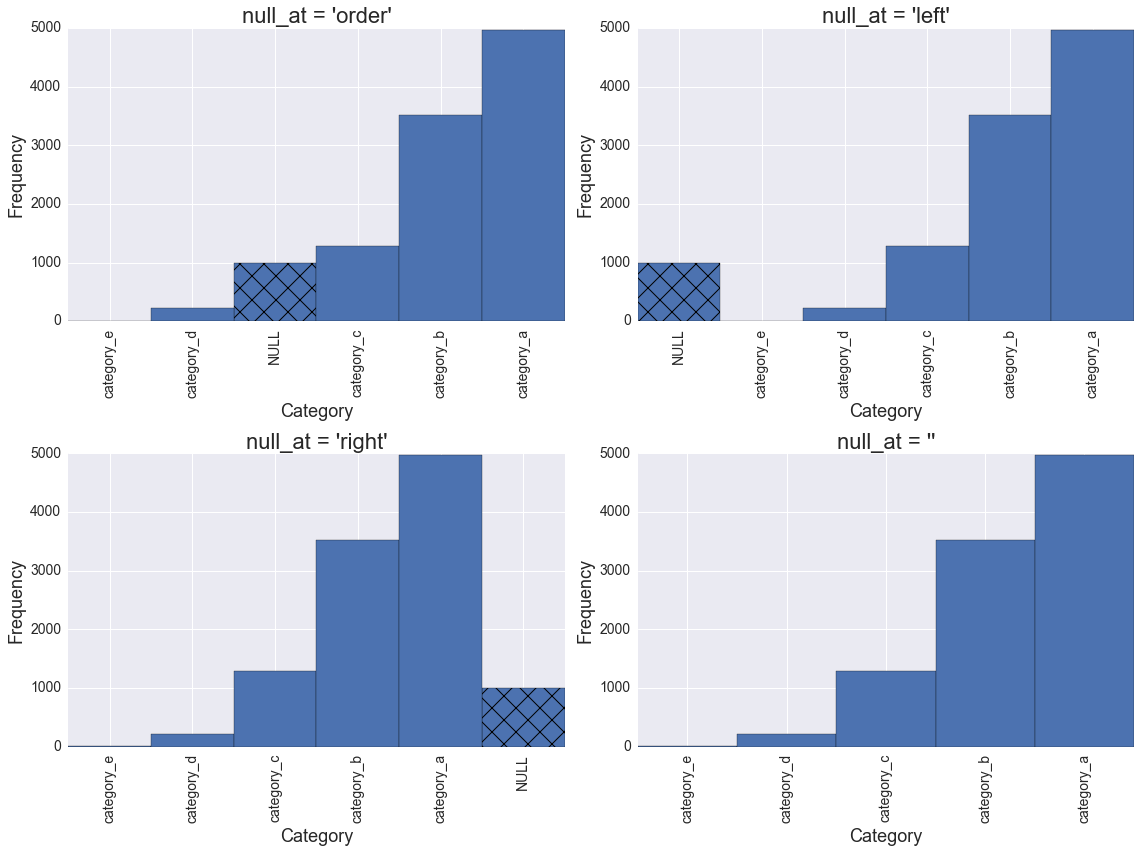

In [11]:
null_at_list = ['order', 'left', 'right', '']
plt.figure(figsize=(16, 12))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plot_categorical_hists(category_hist_df,
                           null_at=null_at_list[i],
                           order_by=0,
                           ascending=True
                          )
    plt.title("null_at = '{}'".format(null_at_list[i]))
    plt.xlabel('Category')
    plt.ylabel('Frequency')

plt.tight_layout()

## Plotting Multiple Histograms
We can similarly plot multiple histograms together on the same plot. We specify our ordering in the same manner, except we choose which histogram we want to order by. This is done by setting the index of the histogram we wish to order by. For example, if we want to order by the first histogram in the list, we specify 0.

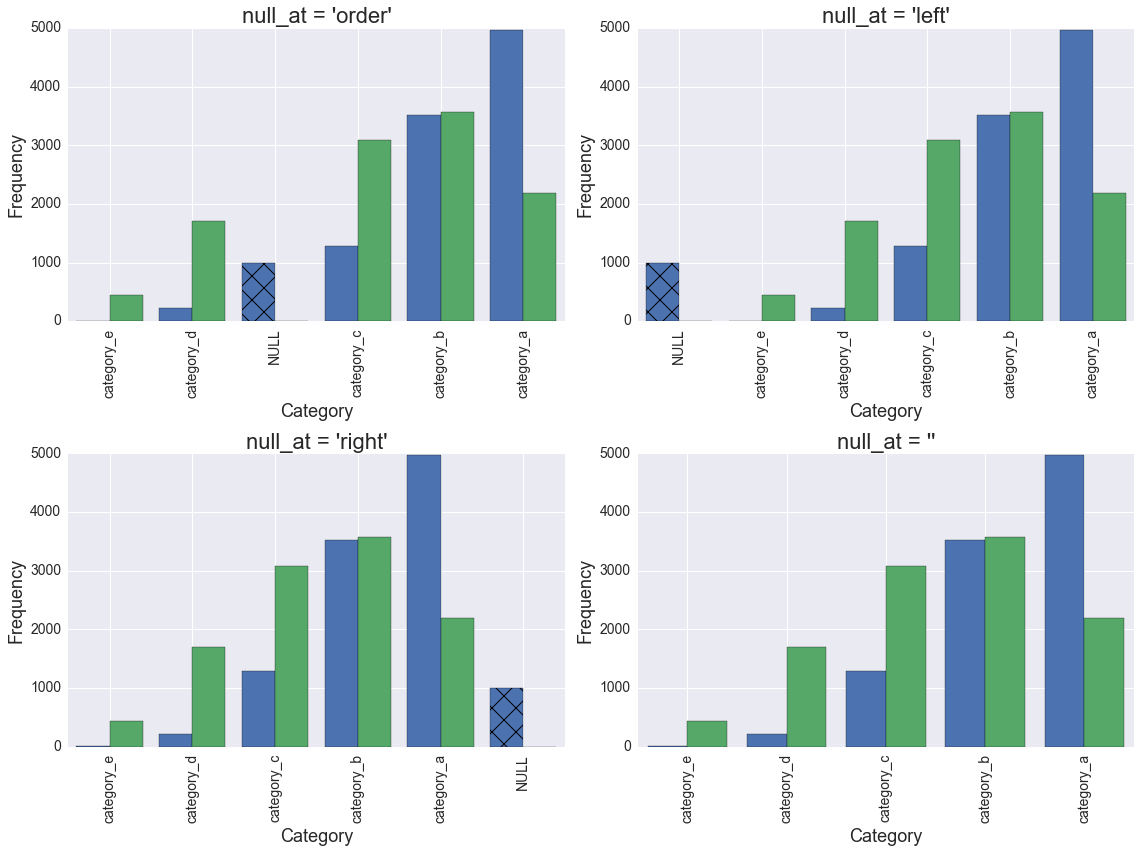

In [12]:
null_at_list = ['order', 'left', 'right', '']
plt.figure(figsize=(16, 12))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plot_categorical_hists([category_hist_df, category_hist_df_2],
                           null_at=null_at_list[i],
                           order_by=0,
                           ascending=True
                          )
    plt.title("null_at = '{}'".format(null_at_list[i]))
    plt.xlabel('Category')
    plt.ylabel('Frequency')

plt.tight_layout()

We may also want to order by the categories in alphabetical order.

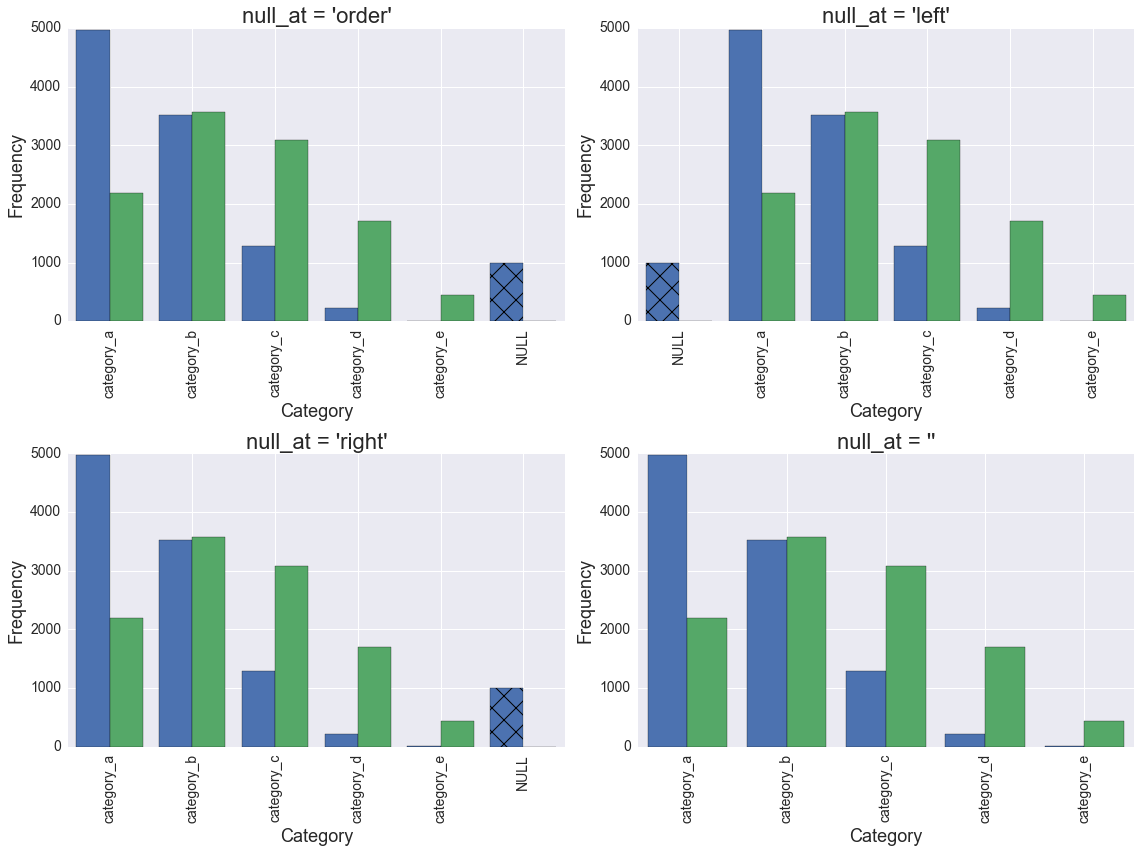

In [13]:
null_at_list = ['order', 'left', 'right', '']
plt.figure(figsize=(16, 12))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plot_categorical_hists([category_hist_df, category_hist_df_2],
                           null_at=null_at_list[i],
                           order_by='alphabetical',
                           ascending=True
                          )
    plt.title("null_at = '{}'".format(null_at_list[i]))
    plt.xlabel('Category')
    plt.ylabel('Frequency')

plt.tight_layout()

# Plot the Numerical Histograms
Plotting numerical variables is a bit trickier since we cannot do a simple group by. Instead, we can use the continuous varaibles and calculate histogram and scatterplot bins from them via the following formula:

$$
  \text{bin_num}(x)=\left\{
  \begin{array}{l}
    \frac{1}{n_{bins}} \left\lfloor \frac{x-\min(x)}{\max(x) - \min(x)} * n_{bins} \right\rfloor  \times \left\{\max(x) - \min(x)\right\} + \min(x), & \text{if } x < \min(x) \\
    \frac{n_{bins}-1}{n_{bins}} \times \left\{\max(x) - \min(x)\right\} + \min(x), & \text{if } x = \min(x)
  \end{array}\right.
$$

Then, we can simply group by these bins and count in the same manner. The variable $\varepsilon>0$ is a small number. This ensures that the fraction inside the floor function is never equal to 1. This would happen in the case that $x$ is equal to the maximum and we would have a bin with potetially only one value (i.e., the max value).



In [14]:
log_hist_df = get_histogram_values('test_data', 'log_col', conn, nbins=25)
log_hist_df_2 = get_histogram_values('test_data', 'log_col_2', conn, nbins=25)

log_hist_df.head()

,bin_nbr,freq
0,4.377583e-07,2006
1,1.999829e+00,773
2,3.999658e+00,618
3,5.999487e+00,517
4,7.999316e+00,483


## Plotting a Single Histogram
To keep the axes clean and not too cluttered, we can actually take advantage of the matplotlib histogram function to plot these. We have already computed the bins and the number of observations found in each one. Using this information, we can apply a histogram on the <code>bin_nbr</code> and add weights, which are equal to the <code>freq</code>.

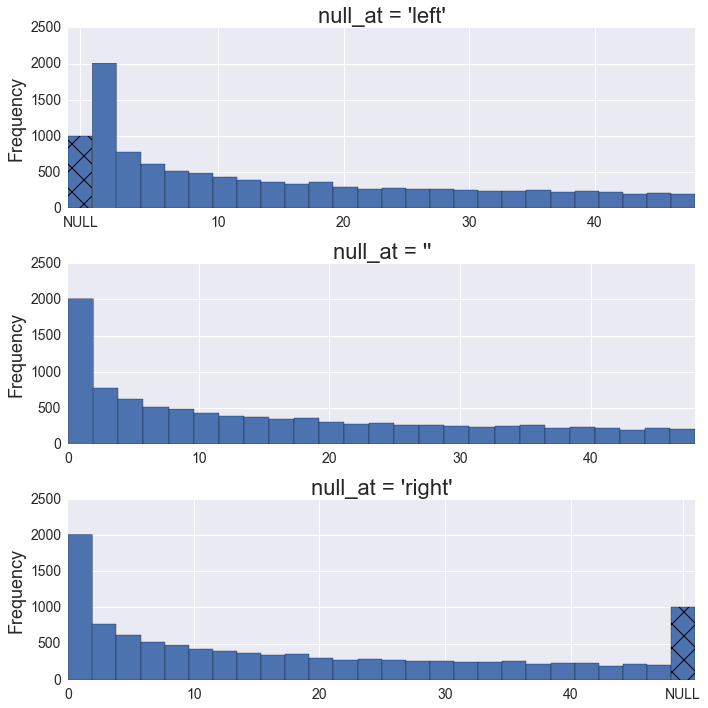

In [15]:
plt.figure(figsize=(10, 10))

plt.subplot(311)
plot_numeric_hists([log_hist_df], nbins=25, null_at='left')
plt.title("null_at = 'left'")
plt.ylabel('Frequency')

plt.subplot(312)
plot_numeric_hists([log_hist_df], nbins=25, null_at='')
plt.title("null_at = ''")
plt.ylabel('Frequency')

plt.subplot(313)
plot_numeric_hists([log_hist_df], nbins=25, null_at='right')
plt.title("null_at = 'right'")
plt.ylabel('Frequency')

plt.tight_layout()

## Plotting Multiple Histograms
Plotting more than one histogram also works the same as before.

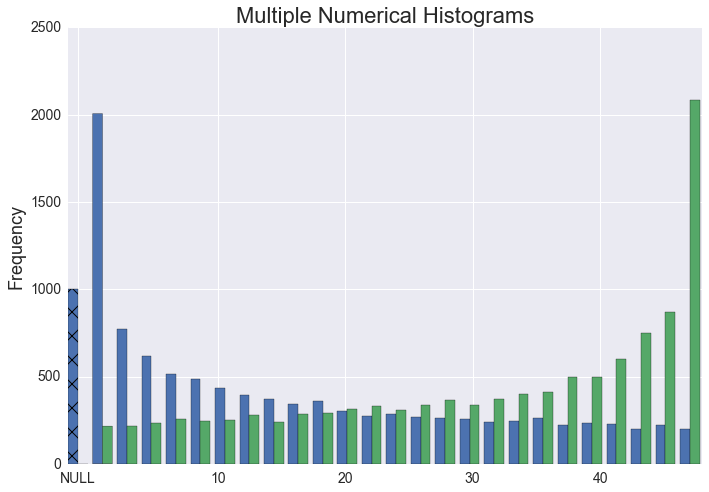

In [16]:
plot_numeric_hists([log_hist_df, log_hist_df_2], nbins=25, null_at='left')
plt.title('Multiple Numerical Histograms')
plt.ylabel('Frequency')
plt.tight_layout()

## Plotting Date Histograms

In [17]:
date_hist_df = get_histogram_values('test_data', 'random_date', conn, nbins=25)
date_hist_df.head()

,bin_nbr,freq
0,2015-01-01 00:00:00,2086
1,2015-01-15 14:24:00,863
2,2015-01-30 04:48:00,567
3,2015-02-13 19:12:00,538
4,2015-02-28 09:36:00,453


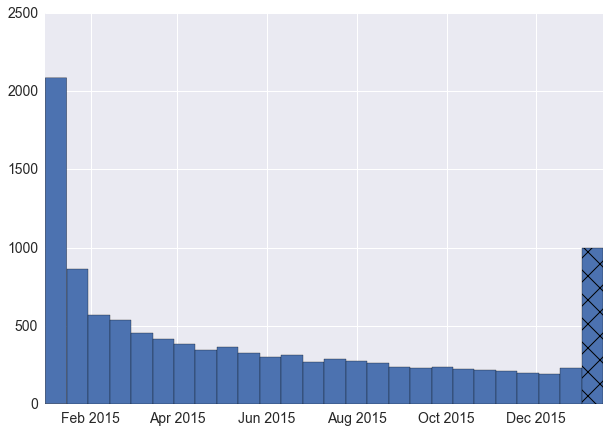

In [18]:
plot_numeric_hists([date_hist_df], null_at='right')
xtick_loc, xtick_labels = plt.xticks()

# TODO: Add null label. Changing it in the same way will replace the dates with their indices
# There are some issues since the labels don't get created until the plot is actually
# shown. We also have issues with plotting more than date histogram. There are also issues with
# plotting more than one date histogram since plt.hist() does not accept multiple date lists.

## Recasting values
If a numeric field is misrepresented as text, we can recast as to a numeric type and the plot will be computed as before.

In [19]:
get_column_names('test_data', conn)

,table_name,column_name,data_type
0,test_data,log_col,double precision
1,test_data,log_col_2,double precision
2,test_data,log_col_int,integer
3,test_data,category_1,text
4,test_data,category_2,text
5,test_data,uncasted_col,text
6,test_data,random_date,date
7,test_data,normal_x,numeric
8,test_data,normal_y,numeric


We can see that <code>uncasted_col</code> is a text type in SQL.

In [20]:
recasted_hist_df = get_histogram_values('test_data', 'uncasted_col', conn, nbins=25, cast_as='NUMERIC')
recasted_hist_df.head()

,bin_nbr,freq
0,50.012550,412
1,54.011576,387
2,58.010602,408
3,62.009628,397
4,66.008654,417


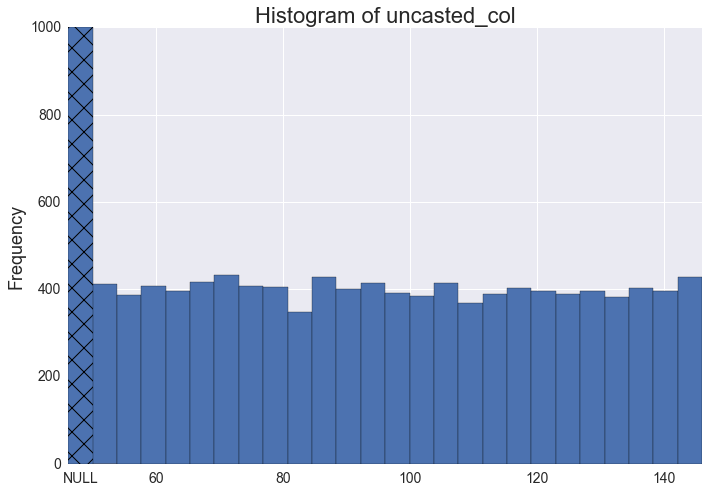

In [21]:
plot_numeric_hists(recasted_hist_df, nbins=25)
plt.title('Histogram of uncasted_col')
plt.ylabel('Frequency')
plt.tight_layout()

## Plotting on a log scale
If the data is highly skewed, can we use plot the frequencies on a log10 scale.

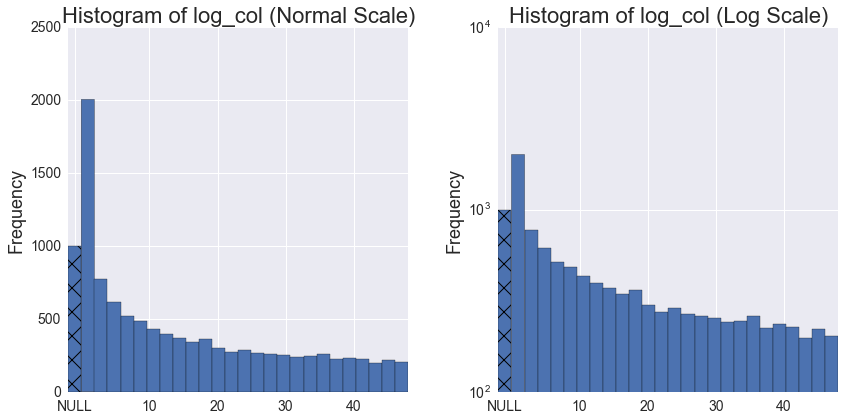

In [22]:
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_numeric_hists(log_hist_df, nbins=25, log=False)
plt.title('Histogram of log_col (Normal Scale)')
plt.ylabel('Frequency')

plt.subplot(122)
plot_numeric_hists(log_hist_df, nbins=25, log=True)
plt.title('Histogram of log_col (Log Scale)')
plt.ylabel('Frequency')

plt.tight_layout()

## Specifying Bin Width
Up until now, we have only specified the number of bins. However, in certain cases, such as if our data are integers, we may want to specify the bin width instead. We can do that using the <code>bin_width</code> parameter. This will automatically ignore the <code>nbins</code> parameter.

In [23]:
log_int_hist_df = get_histogram_values('test_data', 'log_col_int', conn, bin_width=5)
log_int_hist_df.head()

,bin_nbr,freq
0,0.0,3284
1,5.0,1512
2,10.0,1144
3,15.0,930
4,20.0,864


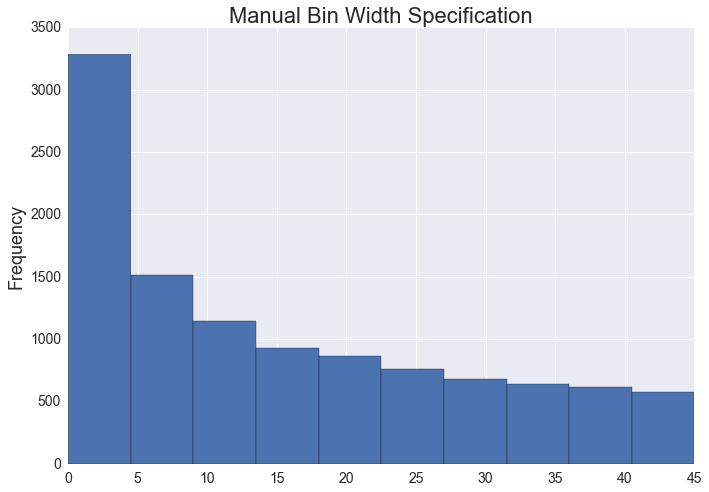

In [24]:
plot_numeric_hists(log_int_hist_df, nbins=log_int_hist_df.shape[0])
plt.title('Manual Bin Width Specification')
plt.ylabel('Frequency')
plt.tight_layout()

## Normalizing Plots
If we are plotting two or more histograms, they may be at different scales. For example, if we want to plot two histograms, but one has many more instances than the other, the smaller data set will not be visible on the histogram.

In [25]:
log_hist_df_small = get_histogram_values('small_test_data', 'log_col', conn, nbins=25)
log_hist_df_small.head()

,bin_nbr,freq
0,0.000108,196
1,1.999184,88
2,3.998260,57
3,5.997336,57
4,7.996412,48


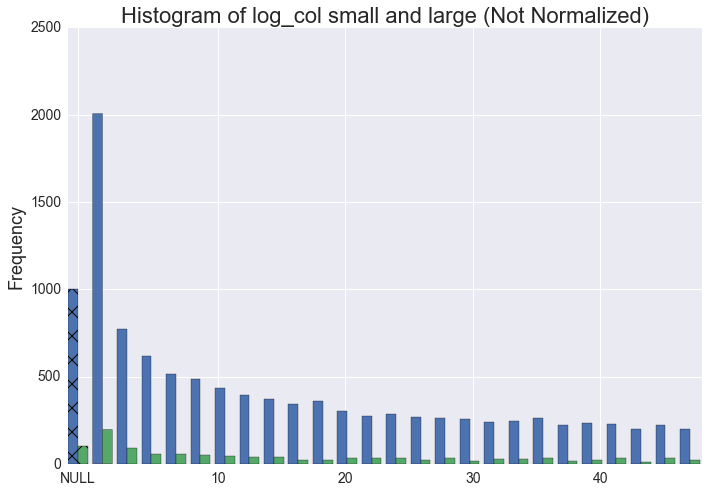

In [26]:
plot_numeric_hists([log_hist_df, log_hist_df_small], nbins=25, normed=False)
plt.title('Histogram of log_col small and large (Not Normalized)')
plt.ylabel('Frequency')
plt.tight_layout()

Because there are much fewer of the green examples, we can normalize each histogram by specifying <code>normed=True</code>.

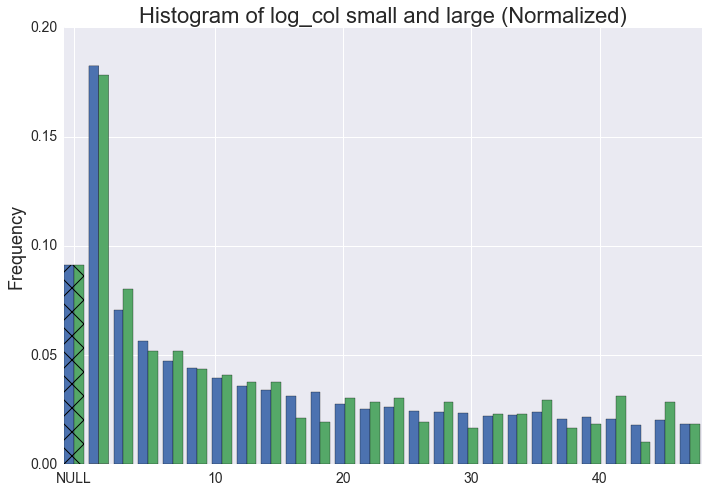

In [27]:
plot_numeric_hists([log_hist_df, log_hist_df_small], nbins=25, normed=True)
plt.title('Histogram of log_col small and large (Normalized)')
plt.ylabel('Frequency')
plt.tight_layout()

# Plot the Summarized Data as a Scatter Plot
We can also plot scatter plots in a similar manner to our histograms. However, we instead bin on the <code>x</code> and <code>y</code> axes independently. Then for each bin, we can do one of two things:

1. Plot a circle with its size proportional to the number of observations found in that bin and/or plot the circle with opacity proportional to the amount of data found in the bin.
2. Plot a heatmap, where higher density areas are represented by higher opacity.

We can use the <code>get_scatterplot_values</code> function to retrieve these values.

In [28]:
# Specify the bin sizes
scatter_df = get_scatterplot_values('test_data', 'normal_x', 'normal_y', conn, bin_size=(0.1, 0.1))
display(scatter_df.head())

# Specify number of bins
scatter_df = get_scatterplot_values('test_data', 'normal_x', 'normal_y', conn, nbins=(100, 100), print_query=False)
display(scatter_df.head())

,scat_bin_x,scat_bin_y,freq
0,-3.787169,-3.952047,0
1,-3.787169,-3.852047,0
2,-3.787169,-3.752047,0
3,-3.787169,-3.652047,0
4,-3.787169,-3.552047,0


,scat_bin_x,scat_bin_y,freq
0,-3.787169,-3.952047,0
1,-3.787169,-3.877572,0
2,-3.787169,-3.803098,0
3,-3.787169,-3.728623,0
4,-3.787169,-3.654148,0


Now that we have retrieved our summarized scatter plot values we can plot them. We can use the <code>plot_scatterplot</code> function to achieve this. We can use <code>plot_type</code> to specify whether we want a scatter plot or a heatmap. If we are plotting a scatter plot, then we can always use flags <code>by_size</code> and <code>by_opacity</code> to make the sizes/opacity proportional to the amount of data in each bin.

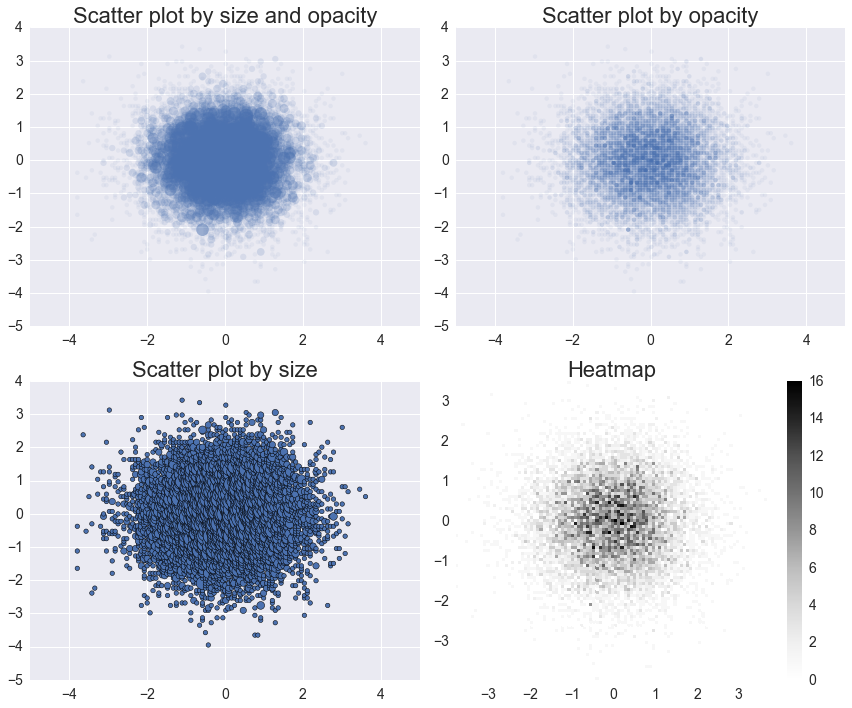

In [29]:
plt.figure(figsize=(12, 10))

plt.subplot(221)
plot_scatterplot(scatter_df, marker='o')
plt.title('Scatter plot by size and opacity')

plt.subplot(222)
plot_scatterplot(scatter_df, plot_type='scatter', by_size=False, marker='o')
plt.title('Scatter plot by opacity')

plt.subplot(223)
plot_scatterplot(scatter_df, plot_type='scatter', by_opacity=False, marker='o')
plt.title('Scatter plot by size')

plt.subplot(224)
plot_scatterplot(scatter_df, plot_type='heatmap')
plt.title('Heatmap')
plt.colorbar()

plt.tight_layout()